<a href="https://colab.research.google.com/github/LeQuXi/numerical-methods-secant-chord-false-position-/blob/main/Newthon_raphson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

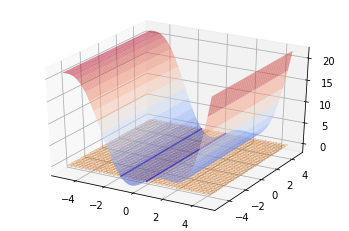

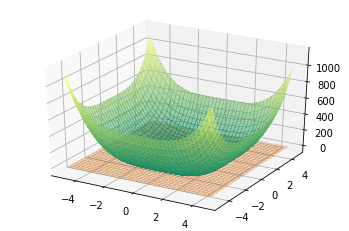

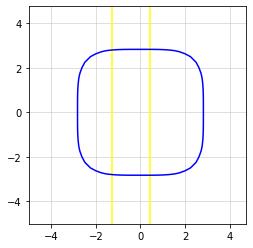

In [22]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
#https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d.html
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html


X = np.arange(-5,5,0.25)
Y = np.arange(-5,5,0.25)
XX, YY = np.meshgrid(X,Y)

Z1 = XX*(XX+2*np.cos(XX))-1
Z2 = XX**4+YY**4-64

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, Z1, cmap=cm.coolwarm,
                       alpha=0.5)
surfZ = ax.plot_surface(XX,YY,np.zeros(np.shape(Z1)), antialiased=False, alpha=0.2)
cp = ax.contour(X, Y, Z1, levels = 0, colors = 'Blue')
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, Z2, cmap=cm.summer,
                       antialiased=False, alpha=0.5)
surfZ = ax.plot_surface(XX,YY,np.zeros(np.shape(Z1)), antialiased=False, alpha=0.2)
cp = ax.contour(X, Y, Z2, levels = 0, colors = 'Pink')
plt.show()

fig = plt.figure()
ax = fig.gca()
ax.grid(color='#C0C0C0', linestyle='-', linewidth=0.5)
cp = ax.contour(X, Y, Z1, levels = 0, colors = 'yellow')
cp = ax.contour(X, Y, Z2, levels = 0, colors = 'blue')
ax.set_aspect('equal', 'box')
plt.show()




[[-1.  1.]]
Iteration     0,f(x) 5.000714e-01
Iteration     1,f(x) 1.554840e-01
Iteration     2,f(x) 3.778790e-03
Iteration     3,f(x) 8.489697e-02
Gradient recalculated condition 1: function increases
Iteration     4,f(x) 7.513920e-02
Gradient recalculated condition 1: function increases
Iteration     5,f(x) 6.642146e-02
Gradient recalculated condition 1: function increases
Iteration     6,f(x) 5.863697e-02
Gradient recalculated condition 1: function increases
Iteration     7,f(x) 5.168988e-02
Gradient recalculated condition 1: function increases
Iteration     8,f(x) 4.549412e-02
Gradient recalculated condition 1: function increases
Iteration     9,f(x) 3.997241e-02
Gradient recalculated condition 1: function increases
Iteration    10,f(x) 3.505535e-02
Gradient recalculated condition 1: function increases
Iteration    11,f(x) 3.068057e-02
Gradient recalculated condition 1: function increases
Iteration    12,f(x) 2.679206e-02
Gradient recalculated condition 1: function increases
Iterat

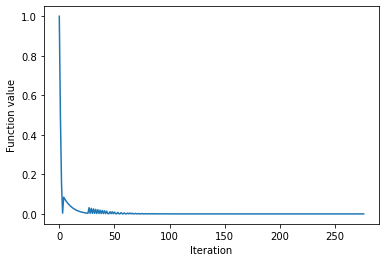

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
# gradient descent method
def funct(x1, x2):
  result = (x1**2+x2**2-3)**2+ (x1**2-x2**2)**2
  return result

def grad(x1, x2):
  #result = np.array([4*(x1**2+x2**2-3)*x1+4*(x1**2-x2**2)*x1, 4*(x1**2+x2**2-3)*x2+4*(x1**2-x2**2)*x2])
  funct_val = funct(x1, x2)
  h = 1e-9
  result = np.array([(funct(x1+h, x2)- funct_val)/h, (funct(x1, x2+h)- funct_val)/h])

  return result

x = -1*np.ones((1,2))
x[0,1] = 1
print(x)
step = 0.1
funct_old = funct(x[0,0],x[0,1])
gradient = grad(x[0,0],x[0,1])
direction = gradient/np.linalg.norm(gradient)
iterationsInSameDirection = 0
functionValues = [funct_old]
for i in range(1000):
  
  
  x = x - step*direction
  funct_new = funct(x[0,0],x[0,1])
  iterationsInSameDirection += 1
  print("Iteration {:5d},f(x) {:7.6e}".format(i,np.abs(funct(x[0,0],x[0,1]))))
  if funct_new > funct_old:
    x = x + step*direction
    step = step /1.05
    gradient = grad(x[0,0],x[0,1])
    direction = gradient/np.linalg.norm(gradient)
    iterationsInSameDirection = 0
    print("Gradient recalculated condition 1: function increases")
  elif ((iterationsInSameDirection+1)%50) == 0:
    gradient = grad(x[0,0],x[0,1])
    direction = gradient/np.linalg.norm(gradient) 
    iterationsInSameDirection = 0
    print("Gradient recalculated condition 2: number of iterations")    
  else:
   funct_old =   funct_new
  functionValues.append(funct_new)  
  if abs(funct_new)< 1e-9:
    break

plt.plot(functionValues)
plt.xlabel('Iteration')
plt.ylabel('Function value')
print(x)
print(np.abs(funct(x[0,0],x[0,1])))

plt.show()